# Rocket League bot

In [1]:
import cv2
import numpy as np

training_dataset = "training_data_2021-02-15-1"
data = np.load("training_data/"+training_dataset+"/training_data-1.npy",allow_pickle=True)

'''
Convert keys to a ...multi-hot... array
    0  1  2  3  4   5   6   7    8
[Z, S, Q, D, ZQ, ZD, SQ, SD, NOKEY] boolean values.
A replaced by Q for french keyboard
'''
data[0][1]

[0, 0, 0, 0, 1, 0, 0, 0, 0]

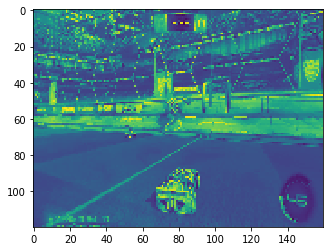

In [2]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0])

In [3]:
import os

training_dataset = "training_data_2021-02-15-1"

l = os.listdir("training_data/"+training_dataset)
# l[0]
len(l)

52

In [4]:
data = np.load("training_data/"+training_dataset+"/"+l[0],allow_pickle=True)
data[0][0]
# data[0][0].size

array([[100, 117, 121, ...,  49, 102,  47],
       [ 89,  88,  91, ..., 171, 226, 233],
       [141, 109, 124, ...,  73,  43,  59],
       ...,
       [ 54,  52,  58, ...,  58,  57,  58],
       [ 51,  50,  56, ...,  56,  58,  58],
       [ 56,  55,  55, ...,  56,  54,  57]], dtype=uint8)

In [5]:
data[0].size

2

In [6]:
import numpy as np
train_data = np.load("training_data/"+training_dataset+"/"+l[0],allow_pickle=True)
for file in l[1:]:
    load_data = np.load("training_data/"+training_dataset+"/"+file,allow_pickle=True)
    train_data = np.concatenate((train_data,load_data))

print ("Train Data: ", train_data.shape)

Train Data:  (26000, 2)


In [7]:
train_data[0][1]

[0, 0, 0, 0, 1, 0, 0, 0, 0]

In [8]:
# z = [1,0,0,0,0,0,0,0,0]
# s = [0,1,0,0,0,0,0,0,0]
# q = [0,0,1,0,0,0,0,0,0]
# d = [0,0,0,1,0,0,0,0,0]
# zq = [0,0,0,0,1,0,0,0,0]
# zd = [0,0,0,0,0,1,0,0,0]
# sq = [0,0,0,0,0,0,1,0,0]
# sd = [0,0,0,0,0,0,0,1,0]
# nk = [0,0,0,0,0,0,0,0,1]

In [9]:
z = []
s = []
q = []
d = []

for data in train_data:
    img = data[0]
    choice = data[1]

    if choice == [1,0,0,0,0,0,0,0,0]:
        z.append([img,choice])
    elif choice == [0,1,0,0,0,0,0,0,0]:
        s.append([img,choice])
    elif choice == [0,0,1,0,0,0,0,0,0]:
        q.append([img,choice])
    elif choice == [0,0,0,1,0,0,0,0,0]:
        d.append([img,choice])

In [10]:
len(z),len(s),len(q),len(d)

(8101, 95, 1280, 1588)

In [11]:
zq = []
zd = []
sq = []
sd = []
nk = []

for data in train_data:
    img = data[0]
    choice = data[1]

    if choice == [0,0,0,0,1,0,0,0,0]:
        zq.append([img,choice])
    elif choice == [0,0,0,0,0,1,0,0,0]:
        zd.append([img,choice])
    elif choice == [0,0,0,0,0,0,1,0,0]:
        sq.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,1,0]:
        sd.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,0,1]:
        nk.append([img,choice])

In [12]:
len(zq),len(zd),len(sq),len(sd),len(nk)

(3704, 3298, 265, 239, 7430)

In [14]:
z1 = z[:len(q)]

In [15]:
z2 = z[:len(q)][:len(d)]

In [18]:
z3 = z[:len(q)][:len(d)][:len(zq)][:len(zd)]

In [19]:
len(z1),len(z2),len(z3)

(1280, 1280, 1280)